In [2]:
import requests

API_KEY = "869f44ca-54ed-45f1-8f36-713e6e24f2d9"  # Leave this blank for now

url = "https://api.harvardartmuseums.org/object"
params = {
    "apikey": API_KEY,
    "classification": "Paintings",
    "size": 10
}

response = requests.get(url, params=params)
print(response.status_code)

200


In [3]:
import requests
import pandas as pd

API_KEY = "809f4fa4-5de4-497f-b7b7-1e0f7e1d62f8"  # Your actual API key

url = "https://api.harvardartmuseums.org/object"
params = {
    "apikey": API_KEY,
    "classification": "Paintings",
    "size": 10  # You can increase this later
}

response = requests.get(url, params=params)
data = response.json()

# Normalize JSON into a flat table
df = pd.json_normalize(data['records'])

# Show the first few rows
print(df.head())

ModuleNotFoundError: No module named 'pandas'

In [5]:
!pip install pandas

In [7]:
import requests
import pandas as pd

# Use your actual API key here
API_KEY = "869f44ca-54ed-45f1-8f36-713e6e24f2d9"

url = "https://api.harvardartmuseums.org/object"
params = {
    "apikey": API_KEY,
    "size": 10,
    "sort": "rank",
    "classification": "Prints",
    "hasimage": 1
}

response = requests.get(url, params=params)
data = response.json()

# Check if response was successful
if response.status_code == 200:
    print("Success")
    print(data['records'])  # Optional: view raw records
else:
    print("Failed")

# Convert to DataFrame
df = pd.DataFrame(data['records'])
df.head()

Success
[{'copyright': None, 'contextualtextcount': 0, 'creditline': 'Harvard Art Museums/Fogg Museum, Gray Collection of Engravings Fund', 'accesslevel': 1, 'createdate': '1994-01-11T00:00:00-05:00', 'dateoflastpageview': '2025-10-06', 'classificationid': 23, 'division': 'European and American Art', 'markscount': 1, 'publicationcount': 2, 'totaluniquepageviews': 1007, 'contact': 'am_europeanamerican@harvard.edu', 'colorcount': 9, 'rank': 10, 'id': 300050, 'state': 'i/iii', 'verificationleveldescription': 'Good. Object is well described and information is vetted', 'period': None, 'images': [{'date': '2024-12-04', 'copyright': 'President and Fellows of Harvard College', 'imageid': 567308, 'idsid': 501234130, 'format': 'image/jpeg', 'description': None, 'technique': 'Make:SONY;Model:ILCE-7RM4;Orientation:1;Software:Adobe Photoshop 25.3 (Macintosh);', 'renditionnumber': '801702', 'displayorder': 1, 'baseimageurl': 'https://nrs.harvard.edu/urn-3:HUAM:801702', 'alttext': None, 'width': 8016

,copyright,contextualtextcount,creditline,accesslevel,createdate,dateoflastpageview,classificationid,division,markscount,publicationcount,...,labeltext,datebegin,culture,exhibitioncount,imagepermissionlevel,mediacount,objectid,techniqueid,dimensions,seeAlso
0,None,0,"Harvard Art Museums/Fogg Museum, Gray Collecti...",1,1994-01-11T00:00:00-05:00,2025-10-06,23,European and American Art,1,2,...,None,1865,French,1,0,0,300050,136.0,chine collé: 39 x 51 cm (15 3/8 x 20 1/16 in.),[{'id': 'https://iiif.harvardartmuseums.org/ma...
1,None,0,"Harvard Art Museums/Fogg Museum, Gray Collecti...",1,1997-09-03T00:00:00-04:00,2025-10-07,23,European and American Art,7,0,...,None,1819,British,0,0,0,279295,312.0,sheet: 28.5 x 41.5 cm (11 1/4 x 16 5/16 in.)\r...,[{'id': 'https://iiif.harvardartmuseums.org/ma...
2,None,0,"Harvard Art Museums/Fogg Museum, Gift of Paul ...",1,1997-10-21T00:00:00-04:00,2025-10-07,23,European and American Art,5,0,...,None,1888,American,0,0,0,256137,116.0,sheet: 45.5 x 60.7 cm (17 15/16 x 23 7/8 in.)\...,[{'id': 'https://iiif.harvardartmuseums.org/ma...
3,None,0,"Harvard Art Museums/Arthur M. Sackler Museum, ...",1,1998-07-12T00:00:00-04:00,2025-10-07,23,Asian and Mediterranean Art,0,0,...,None,1794,Japanese,1,0,0,207628,NaN,Paper: H. 36.9 cm x W. 23.7 cm (14 1/2 x 9 5/1...,[{'id': 'https://iiif.harvardartmuseums.org/ma...
4,"© Artists Rights Society (ARS), New York / VG ...",0,"Harvard Art Museums/Fogg Museum, Gift of Peter...",1,2009-10-27T17:29:30-04:00,2025-10-07,23,Modern and Contemporary Art,3,0,...,None,1924,German,1,1,0,333591,4769.0,sheet: 34.5 x 37 cm (13 9/16 x 14 9/16 in.)\r\...,[{'id': 'https://iiif.harvardartmuseums.org/ma...


In [8]:
columns_needed = [
    'id', 'title', 'culture', 'period', 'century', 'medium',
    'dimensions', 'description', 'department', 'classification',
    'accessionyear', 'accessionmethod'
]

df_metadata = df[columns_needed]
print(df_metadata.head())

       id                                              title   culture  \
0  300050                                          The Races    French   
1  279295                               Ben Arthur, Scotland   British   
2  256137                                  Perils of the Sea  American   
3  207628  Actor Segawa Kikunojō 3rd as Oshizu, the Wife ...  Japanese   
4  333591  Abandoned post near Vis-en Artois (Verlassene ...    German   

                  period       century  \
0                   None  19th century   
1                   None  19th century   
2                   None  19th century   
3  Edo period, 1615-1868  18th century   
4                   None  20th century   

                                              medium  \
0                          Lithograph on chine collé   
1  Etching and mezzotint printed in brown ink on ...   
2                    Etching on off white wove paper   
3  Ukiyo-e woodblock print in "ōban" format; ink,...   
4  Etching, drypoint a

In [9]:
import sqlite3

# Connect to SQLite database (or create one)
conn = sqlite3.connect("harvard_artifacts.db")
cursor = conn.cursor()

# Create the artifact_metadata table
cursor.execute("""
CREATE TABLE IF NOT EXISTS artifact_metadata (
    id INTEGER PRIMARY KEY,
    title TEXT,
    culture TEXT,
    period TEXT,
    century TEXT,
    medium TEXT,
    dimensions TEXT,
    description TEXT,
    department TEXT,
    classification TEXT,
    accessionyear INTEGER,
    accessionmethod TEXT
)
""")

# Insert data from DataFrame
df_metadata.to_sql("artifact_metadata", conn, if_exists="append", index=False)

print("Data inserted successfully!")
conn.close()

Data inserted successfully!


In [10]:
import sqlite3

conn = sqlite3.connect("harvard_artifacts.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS artifact_media (
    objectid INTEGER,
    imagecount INTEGER,
    mediacount INTEGER,
    colorcount INTEGER,
    rank INTEGER,
    datebegin INTEGER,
    dateend INTEGER
)
""")
conn.commit()

In [11]:
media_columns = [
    'objectid', 'imagecount', 'mediacount', 'colorcount',
    'rank', 'datebegin', 'dateend'
]

df_media = df[media_columns]
df_media.to_sql("artifact_media", conn, if_exists="append", index=False)
print("Media data inserted!")

Media data inserted!


In [13]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS artifact_colors (
    objectid INTEGER,
    color TEXT,
    spectrum TEXT,
    hue TEXT,
    percent REAL,
    css3 TEXT
)
""")
conn.commit()

In [14]:
color_rows = []

for record in data['records']:
    objectid = record.get('objectid')
    colors = record.get('colors', [])
    for color in colors:
        color_rows.append({
            'objectid': objectid,
            'color': color.get('color'),
            'spectrum': color.get('spectrum'),
            'hue': color.get('hue'),
            'percent': color.get('percent'),
            'css3': color.get('css3')
        })

df_colors = pd.DataFrame(color_rows)
df_colors.to_sql("artifact_colors", conn, if_exists="append", index=False)
print("Color data inserted!")
conn.close()

Color data inserted!


In [15]:
SELECT m.id, m.title, md.rank
FROM artifact_metadata AS m
JOIN artifact_media AS md ON m.id = md.objectid
ORDER BY md.rank DESC
LIMIT 10;

SyntaxError: invalid syntax (3299140628.py, line 1)

In [16]:
%%sql sqlite://
SELECT m.id, m.title, md.rank
FROM artifact_metadata AS m
JOIN artifact_media AS md ON m.id = md.objectid
JOIN artifact_colors AS c ON m.id = c.objectid
WHERE c.color = 'red'
ORDER BY md.rank DESC
LIMIT 10;

UsageError: Cell magic `%%sql` not found.


In [17]:
!pip install ipython-sql

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ------------------------ --------------- 1.3/2.1 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 9.2 MB/s  0:00:00

   ---------------- ----------------------- 2/5 [sqlalchemy]
   ---------------- ----------------------- 2/5 [sqlalchemy]
   ---------------- ----------------------- 2/5 [sqlalchemy]
   ---------------- ----------------------- 2/5 [sqlalchemy]
   ---------------- ----------------------- 2/5 [sqlalchemy]
   ---------------- ----------------------- 2/5 [sqlalchemy]
   ---------------- ----------------------- 2/5 [sqlalchemy]
   ---------------- ----------------------- 2/5 [sqlalchemy]
   ---------------- ----------------------- 2/5 [sqlalchemy]
   ---------------------------------------- 5/5 [ipython-sql]



In [18]:
%load_ext sql

In [19]:
%load_ext sql
%%sql sqlite:///harvard_artifacts.db

SELECT * FROM artifact_metadata LIMIT 5;

SyntaxError: invalid syntax (2876287460.py, line 4)

In [20]:
%load_ext sql
%sql sqlite:///harvard_artifacts.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [21]:
%%sql
SELECT * FROM artifact_metadata LIMIT 5;

 * sqlite:///harvard_artifacts.db
Done.


KeyError: 'DEFAULT'

In [22]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("harvard_artifacts.db")
query = "SELECT * FROM artifact_metadata LIMIT 5;"
df = pd.read_sql_query(query, conn)
print(df)
conn.close()

       id                                              title   culture  \
0   55407                           The Apostle Jean Journet    French   
1  207628  Actor Segawa Kikunojō 3rd as Oshizu, the Wife ...  Japanese   
2  255463                                              Comet  American   
3  256137                                  Perils of the Sea  American   
4  262439                                   The Smoking Fire   Italian   

                  period       century  \
0                   None  19th century   
1  Edo period, 1615-1868  18th century   
2                   None  20th century   
3                   None  19th century   
4                   None  18th century   

                                              medium  \
0                                               None   
1  Ukiyo-e woodblock print in "ōban" format; ink,...   
2  Linoleum cut with added wash to attenuate the ...   
3                    Etching on off white wove paper   
4          Etching on 

In [23]:
st.selectbox(), st.slider(), st.text_input()

NameError: name 'st' is not defined

In [24]:
import streamlit as st

sid = st.text_input("Enter SID")

ModuleNotFoundError: No module named 'streamlit'

In [25]:
df_gift = df[df["Accomplishment"] == "Gift"]
print(df_gift)

KeyError: 'Accomplishment'

In [26]:
import os
print(os.listdir())

['.ipynb_checkpoints', '.ipython', '.jupyter', '.python_history', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Favorites', 'harvard_artifacts.db', 'harvard_project.ipynb', 'Links', 'Local Settings', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{2a740c2d-06bd-11f0-b0db-d8b32f9f439e}.TM.blf', 'NTUSER.DAT{2a740c2d-06bd-11f0-b0db-d8b32f9f439e}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{2a740c2d-06bd-11f0-b0db-d8b32f9f439e}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'Start Menu', 'Templates', 'Untitled.ipynb', 'Untitled1.ipynb']


In [27]:
df_gift = pd.read_csv("C:/Users/Ashwin/Documents/harvard_project1/accomplishment1.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Ashwin/Documents/harvard_project1/accomplishment1.csv'

In [28]:
df_gift = pd.read_csv("data/accomplishment1.csv")  # if it's in a folder called 'data'

FileNotFoundError: [Errno 2] No such file or directory: 'data/accomplishment1.csv'

In [29]:
import os
print(os.getcwd())

C:\Users\ashwi


In [30]:
print(os.listdir("data"))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data'

In [31]:
import os
print(os.getcwd())

C:\Users\ashwi


In [32]:
C:\Users\cloudy

SyntaxError: unexpected character after line continuation character (2938340656.py, line 1)

In [33]:
fileRead = pd.read_csv(r"C:\Users\Lloyd\OneDrive\Documents\art.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Lloyd\\OneDrive\\Documents\\art.csv'

In [34]:
from io import StringIO

df = pd.read_csv(StringIO(file_data))
print(df.head())

NameError: name 'file_data' is not defined

In [35]:
C:\Users\elijah\OneDrive\Documents\

SyntaxError: unexpected character after line continuation character (2320100966.py, line 1)

In [36]:
from io import StringIO

def main():
    input = StringIO('1\n2 3\n4 5\n')
    T = int(input.readline())
    for i in range(T):
        a, b = map(int, input.readline().split())
        print(f'Case #{i+1}: {a+b}')

In [37]:
for a in range(T):
    a, b = map(int, input.readline().split())
    print(f'Case #{a+1}: {a+b}')

NameError: name 'T' is not defined

In [38]:
!conda install -c conda-forge scikit-learn

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [39]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------- ----------------------------- 2.4/8.7 MB 12.5 MB/s eta 0:00:01
   -------------------------- ------------- 5.8/8.7 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 13.5 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   --- ------------------------------------ 3.1/38.5 MB 14.7 MB/s eta 0:00:03
   ------ --------------------------------- 6.0/38.5 MB 14.7 MB/s eta 0:00:03
   --------- ------------------------------ 9.4/38.5 MB 14.9 MB/s eta 0:00:02
   ------------ --------------------------- 12.3/38.5 MB 14.8 MB/s eta 0:00:02
   --------------- ------------------------ 14.9/38.5 MB 14.4 MB/s eta 0:00:02
   ------------------ --------------------- 17.8/38.5 MB 14.2 MB/s eta 0:00:02
   -------------------- ------------------- 20.2/38.5 MB 13.9 MB/s eta 0:00:02
   ---

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([[1], [2], [3], [4], [5]])
y = np.array([2.3, 4.5, 6.7, 8.9, 11.1])

model = LinearRegression()
model.fit(x, y)

for i in range(6, 11):
    print(f"x = {i}, y = {model.predict([[i]]).tolist()[0]}")

x = 6, y = 13.3
x = 7, y = 15.5
x = 8, y = 17.7
x = 9, y = 19.9
x = 10, y = 22.099999999999998


In [41]:
import matplotlib.pyplot as plt

x_test = np.array([[i] for i in range(1, 11)])
y_pred = model.predict(x_test)

plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x_test, y_pred, color='red', label='Regression Line')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Prediction")
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [42]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 9.9 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 10.1 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.6 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------------------------- -- 2.1/2.3 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 9.9 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------------- -------------------------- 2.4/7.0 MB 11.7 MB/s eta 0:00:01
   --------------------------- ------------ 4.7/7.0 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 11.2 MB/s  0:00:00

   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pill

In [43]:
import matplotlib.pyplot as plt

In [44]:
!pip install matplotlib numpy

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("your_file.csv")  # Replace with actual filename

FileNotFoundError: [Errno 2] No such file or directory: 'your_file.csv'

In [3]:
import os
print(os.getcwd())

C:\Users\ashwi


In [4]:
C:\Users\palsi

SyntaxError: unexpected character after line continuation character (752699157.py, line 1)

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv("your_file.csv")  # Or use full path if needed

FileNotFoundError: [Errno 2] No such file or directory: 'your_file.csv'

In [8]:
print(os.getcwd())
print(os.listdir())

C:\Users\ashwi
['.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.python_history', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Favorites', 'harvard_artifacts.db', 'harvard_project.ipynb', 'Links', 'Local Settings', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{2a740c2d-06bd-11f0-b0db-d8b32f9f439e}.TM.blf', 'NTUSER.DAT{2a740c2d-06bd-11f0-b0db-d8b32f9f439e}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{2a740c2d-06bd-11f0-b0db-d8b32f9f439e}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'Start Menu', 'Templates', 'Untitled.ipynb', 'Untitled1.ipynb']


In [9]:
x = np.array([[1], [2], [3], [4], [5]])
y = np.array([2.3, 4.5, 6.7, 8.9, 11.1])

model = LinearRegression()
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


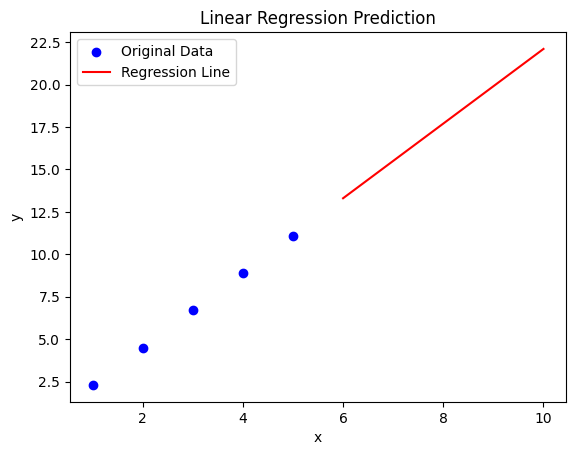

In [10]:
x_test = np.array([[i] for i in range(6, 11)])
y_pred = model.predict(x_test)

plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x_test, y_pred, color='red', label='Regression Line')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Prediction")
plt.legend()
plt.show()

In [11]:
import streamlit as st

x_vals = st.slider("Choose x values", 1, 10, (1, 6))

ModuleNotFoundError: No module named 'streamlit'